In [25]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve,auc

[ 1.  1. -1.  1. -1.]
[1. 1. 0. 1. 0.]


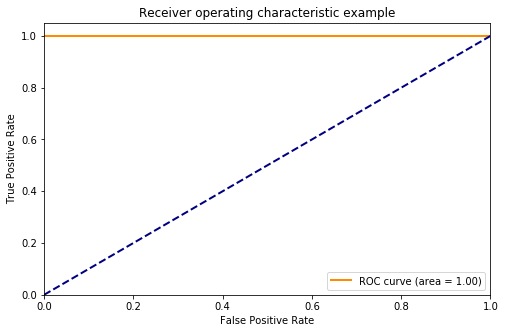

In [26]:
#构造训练集，测试集
train_x = [[0.], [1.], [1.], [0.], [1.]]
train_y = [0., 1., 1., 0., 1.]
test_x = [[1.], [1.], [0.], [1.], [0.]]
test_y = [1., 1., 0., 1., 0.]
#构造模型
svm=svm.SVC(kernel="linear",probability=True)
#拟合模型
model=svm.fit(train_x,train_y)
#求出分值：样本点到超平面的距离
test_y_score=model.decision_function(test_x)
#预测
prediction=model.predict(test_x)
print(test_y_score)
print(prediction)
#求出fpr,tpr,阈值
fpr,tpr,threshold=roc_curve(test_y,test_y_score)
#求auc
roc_auc=auc(fpr,tpr)
###画出roc曲线
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from sklearn.cross_validation import train_test_split

<Figure size 432x288 with 0 Axes>

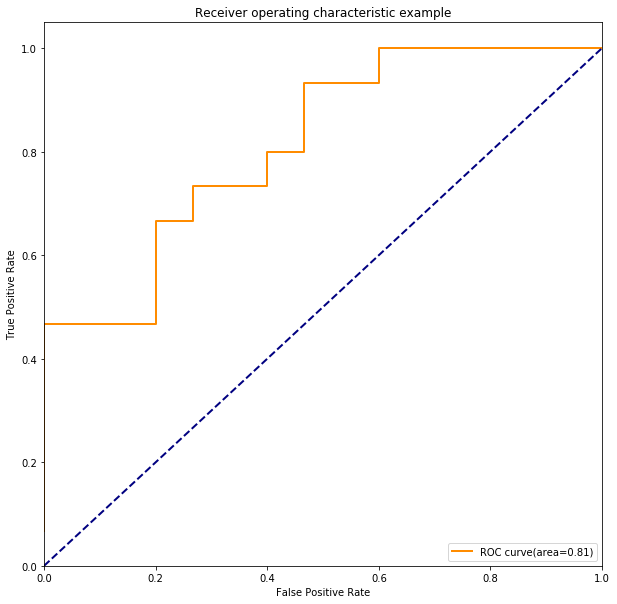

In [35]:
#导入数据集iris，包括四种花瓣的特征数据，以及花的种类：0，1，2
iris=datasets.load_iris()
x=iris.data
y=iris.target
#去掉类别为2的数据，二分类问题
x,y=x[y!=2],y[y!=2]
#添加噪声
random_state=np.random.RandomState(0)
n_samples,n_features=x.shape
x=np.c_[x,random_state.randn(n_samples,200*n_features)]
#划分训练集，测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
#构建模型
svm=svm.SVC(kernel="linear",random_state=random_state)
#训练模型，得出分值：样本点到超平面的距离
y_score=svm.fit(x_train,y_train).decision_function(x_test)
#预测
y_predict=svm.predict(x_test)
#求fpr,tpr,阈值
fpr,tpr,threshold=roc_curve(y_test,y_score)
#求auc
roc_auc=auc(fpr,tpr)
#画出ROC曲线
plt.figure()
lw=2
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color="darkorange",lw=lw,label="ROC curve(area=%0.2f)"% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


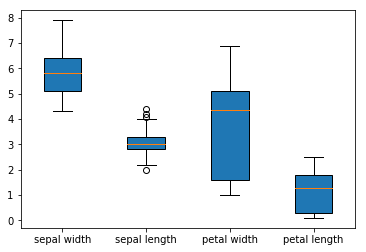

In [36]:
#画花瓣特征的箱线图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(iris.data,labels={"sepal length","sepal width","petal length","petal width"},patch_artist=True)
plt.show()


In [33]:
x

array([[ 5.1       ,  3.5       ,  1.4       , ..., -1.07709907,
        -0.4246633 , -0.8299646 ],
       [ 4.9       ,  3.        ,  1.4       , ...,  1.4121517 ,
        -1.38043075, -0.53591456],
       [ 4.7       ,  3.2       ,  1.3       , ...,  0.65880214,
        -0.59691711, -0.22295918],
       ...,
       [ 6.2       ,  2.9       ,  4.3       , ..., -0.8281054 ,
        -1.43286053, -0.60855489],
       [ 5.1       ,  2.5       ,  3.        , ...,  0.06532704,
        -0.55380986, -0.88254487],
       [ 5.7       ,  2.8       ,  4.1       , ..., -1.04873453,
         0.37475842, -0.98731143]])

In [31]:
x.shape

(100, 804)

In [22]:
y_score

array([ 0.17267435,  0.65502116, -0.54222913,  0.3548153 ,  0.0043917 ,
       -0.20117165,  0.05791453,  0.00383045, -0.15164967,  0.25616448,
        0.39700001,  0.04521194,  0.33390031, -0.12555765,  0.23799148,
       -0.36378854, -0.08697789, -0.11682054, -0.25244267, -0.23321231,
       -0.18097178, -0.10763756, -0.32069159,  0.72074967, -0.29360569,
       -0.2213709 , -0.32328807, -0.19504498, -0.24365451,  0.37595292])

In [23]:
y_predict

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1])

In [38]:
#libsvm（需要安装libsvm）
#libsvm是基于支持向量机(support vector machine, SVM)实现的开源库,由台湾大学林智仁(Chih-Jen Lin)教授等开发,主要用于回归和分类
#libsvm具有操作简单、易于使用、快速有效、且对SVM所涉及的参数调节相对较少的特点。
import sys
sys.path.append("D:\用户目录\下载\libsvm-3.23\python")
from svmutil import *
#读取libsvm中自带的数据—heart_scale
y, x = svm_read_problem("D:\用户目录\下载\libsvm-3.23/heart_scale")
#确定训练集,模型训练
m=svm_train(y[:200],x[:200],"-c 4")
#预测
p_label,p_acc,p_val=svm_predict(y[200:],x[200:],m)

Accuracy = 84.2857% (59/70) (classification)


In [ ]:
import data